# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
path = r'C:\Users\Natanael_Quintiliano\EBAC\Exercicios_EBAC\Etapa_3\Bases_de_Dados\SINASC_RO_2019.csv'
df_sinasc = pd.read_csv(path)
df_sinasc.sample(5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
8853,1,4001303.0,110020,1,35,1.0,4 a 7 anos,354705.0,3.0,1.0,...,4,8924,ATIVO,MUNIC,Nova Mamoré,Rondônia,-10.41177,-65.32915,151.0,10071.643
15331,1,2496046.0,110004,1,16,1.0,8 a 11 anos,999991.0,0.0,0.0,...,9,1481873,ATIVO,MUNIC,Cacoal,Rondônia,-11.43387,-61.44294,177.0,3792.998
18398,1,2495279.0,110012,1,28,1.0,8 a 11 anos,999992.0,2.0,1.0,...,5,1484956,ATIVO,MUNIC,Ji-Paraná,Rondônia,-10.88205,-61.94509,157.0,6896.648
14774,1,2515520.0,110002,1,33,5.0,8 a 11 anos,999992.0,1.0,0.0,...,5,1481310,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571
6368,1,4001303.0,110020,1,38,5.0,12 anos ou mais,241005.0,1.0,NaN,...,5,6411,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
pd.set_option('display.precision', 3)

df_latitude = pd.cut(df_sinasc['munResLat'], [-15.5, -10.5, -5.5])

df_sinasc.pivot_table(values = ['QTDPARTNOR'
                                        ,'QTDPARTCES']
                               ,index = [df_latitude]
                               ,aggfunc = {'QTDPARTNOR': [('Min', 'min')
                                                          ,('Max', 'max')
                                                          ,('Média', 'mean')
                                                          ,('Mediana', 'median')
                                                          ,('Soma', 'sum')
                                                          ,('Desvio Padrão', 'std')
                                                          ,('Variancia', 'var')
                                                         ]
                                           ,'QTDPARTCES': [('Min', 'min')
                                                                  ,('Max', 'max')
                                                                  ,('Média', 'mean')
                                                                  ,('Mediana', 'median')
                                                                  ,('Soma', 'sum')
                                                                  ,('Desvio Padrão', 'std')
                                                                  ,('Variancia', 'var')
                                                                 ]})

QTDPARTCES                                              \
               Desvio Padrão   Max Mediana  Min  Média    Soma Variancia   
munResLat                                                                  
(-15.5, -10.5]         0.753  12.0     0.0  0.0  0.553  7095.0     0.567   
(-10.5, -5.5]          0.738  12.0     0.0  0.0  0.487  6041.0     0.544   

                  QTDPARTNOR                                              
               Desvio Padrão   Max Mediana  Min  Média    Soma Variancia  
munResLat                                                                 
(-15.5, -10.5]         1.123  41.0     0.0  0.0  0.452  5800.0     1.262  
(-10.5, -5.5]          1.279  40.0     0.0  0.0  0.712  8771.0     1.636

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [4]:
pd.set_option('display.precision', 3)

faixa_area = pd.cut(df_sinasc['munResArea'], [-2000, 3000, 4000])

df_sinasc.pivot_table(values = ['QTDFILVIVO'
                                ,'QTDFILMORT']
                                ,index = [faixa_area]
                                ,aggfunc = {'QTDFILVIVO': [('Min', 'min')
                                                          ,('Max', 'max')
                                                          ,('Média', 'mean')
                                                          ,('Mediana', 'median')
                                                          ,('Soma', 'sum')
                                                          ,('Desvio Padrão', 'std')
                                                          ,('Variancia', 'var')
                                                         ]
                                            ,'QTDFILMORT': [('Min', 'min')
                                                           ,('Max', 'max')
                                                           ,('Média', 'mean')
                                                           ,('Mediana', 'median')
                                                           ,('Soma', 'sum')
                                                           ,('Desvio Padrão', 'std')
                                                           ,('Variancia', 'var')
                                                          ]})

QTDFILMORT                                             \
              Desvio Padrão  Max Mediana  Min  Média    Soma Variancia   
munResArea                                                               
(-2000, 3000]         0.551  4.0     0.0  0.0  0.245  1260.0     0.304   
(3000, 4000]          0.576  6.0     0.0  0.0  0.268   705.0     0.331   

                 QTDFILVIVO                                              
              Desvio Padrão   Max Mediana  Min  Média    Soma Variancia  
munResArea                                                               
(-2000, 3000]         1.075  30.0     1.0  0.0  0.924  4773.0     1.157  
(3000, 4000]          1.068  10.0     1.0  0.0  1.011  2862.0     1.140

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [35]:
pd.set_option('display.precision', 3)

df_faixa_alt = pd.cut(df_sinasc['munResAlt'], 5)

df_sinasc.pivot_table(values=['IDADEMAE', 'IDADEPAI']
                       ,index=[df_faixa_alt]
                       ,aggfunc={'IDADEMAE': [('Min', 'min')
                                            ,('Max', 'max')
                                            ,('Média', 'mean')
                                            ,('Mediana', 'median')
                                            ,('Soma', 'sum')
                                            ,('Desvio Padrão', 'std')
                                            ,('Variancia', 'var')
                                            ]
                                ,'IDADEPAI': [('Min', 'min')
                                             ,('Max', 'max')
                                             ,('Média', 'mean')
                                             ,('Mediana', 'median')
                                             ,('Soma', 'sum')
                                             ,('Desvio Padrão', 'std')
                                             ,('Variancia', 'var')
                                              ]}
                                ,dropna=True)

IDADEMAE                                            \
               Desvio Padrão Max Mediana Min   Média    Soma Variancia   
munResAlt                                                                
(84.49, 187.0]         6.427  52    25.0  11  26.027  524269    41.301   
(187.0, 289.0]         6.213  53    26.0  13  26.280  114398    38.603   
(289.0, 391.0]         6.403  53    25.0  13  25.841   14807    40.994   
(391.0, 493.0]         6.485  47    26.0  14  26.448    9733    42.052   
(493.0, 595.0]         6.311  46    26.0  14  26.434   42030    39.828   

                    IDADEPAI                                                  
               Desvio Padrão   Max Mediana   Min   Média      Soma Variancia  
munResAlt                                                                     
(84.49, 187.0]         7.884  73.0    30.0  15.0  31.125  137761.0    62.158  
(187.0, 289.0]         7.654  86.0    30.0  16.0  31.076   76821.0    58.585  
(289.0, 391.0]         7.369  61.0    29.0  17.0  29.853   11135.0    54.309  
(391.0, 493.0]         7.440  53.0    30.0  16.0  30.152    4975.0    55.349  
(493.0, 595.0]         6.813  60.0    34.0  18.0  34.153    5806.0    46.414

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [32]:
dict_imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

<Axes: xlabel='imediatas', ylabel='idade_mãe'>

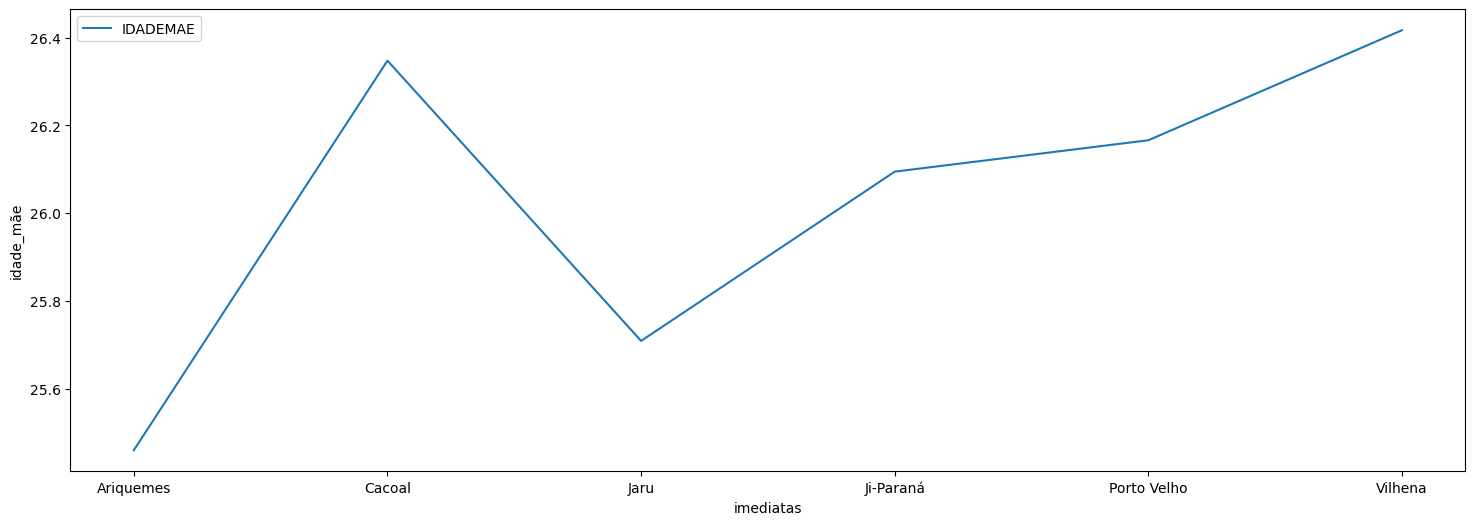

In [34]:
imediatas_idade_mae = df_sinasc.set_index('munResNome').groupby(dict_imediatas)['IDADEMAE'].mean().to_frame().plot(figsize=[18 ,6])
plt.ylabel('idade_mãe')
plt.xlabel('imediatas')
imediatas_idade_mae

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [37]:
dict_idh = {
    "Alta Floresta D'Oeste" : 'IDH-médio', 
    'Alto Alegre dos Parecis': 'IDH-baixo',
    'Novo Horizonte do Oeste': 'IDH-médio', 
    'Rolim de Moura': 'IDH-alto', 
    "São Felipe D'Oeste": 'IDH-médio',
    'Ariquemes': 'IDH-alto', 
    'Cujubim': 'IDH-médio', 
    'Alto Paraíso': 'IDH-médio', 
    'Monte Negro': 'IDH-médio', 
    'Jaru': 'IDH-médio',
    'Rio Crespo': 'IDH-médio', 
    'Porto Velho': 'IDH-alto', 
    'Cacaulândia': 'IDH-médio', 
    'Itapuã do Oeste': 'IDH-médio',
    'Ji-Paraná': 'IDH-alto', 
    'Buritis': 'IDH-médio', 
    'Vilhena':'IDH-alto', 
    'Vale do Anari':'IDH-baixo',
    'Candeias do Jamari':'IDH-médio', 
    'Costa Marques':'IDH-médio', 
    'Campo Novo de Rondônia':'IDH-baixo',
    "Machadinho D'Oeste": 'IDH-baixo', 
    'Colorado do Oeste': 'IDH-médio', 
    'Nova Mamoré': 'IDH-baixo', 
    'Urupá': 'IDH-médio',
    'Ouro Preto do Oeste': 'IDH-médio', 
    'Corumbiara':'IDH-médio', 
    'São Miguel do Guaporé':'IDH-médio',
    'Governador Jorge Teixeira': 'IDH-baixo', 
    "Santa Luzia D'Oeste":'IDH-médio',
    'Pimenta Bueno': 'IDH-alto', 
    'Mirante da Serra':'IDH-médio', 
    'Cerejeiras':'IDH-médio',
    'Presidente Médici':'IDH-médio',
    'Cacoal': 'IDH-alto',
    'Parecis':'IDH-médio', 
    "Espigão D'Oeste":'IDH-médio',
    'São Francisco do Guaporé':'IDH-médio', 
    'Ministro Andreazza':'IDH-médio',
    "Nova Brasilândia D'Oeste":'IDH-médio', 
    "Alvorada D'Oeste":'IDH-médio',
    'Primavera de Rondônia':'IDH-médio', 
    'Seringueiras':'IDH-baixo',
    'Castanheiras':'IDH-médio', 
    'Chupinguaia':'IDH-médio', 
    'Guajará-Mirim':'IDH-médio',
    'Theobroma':'IDH-baixo',
    'Nova União':'IDH-baixo', 
    'Teixeirópolis':'IDH-médio', 
    'Vale do Paraíso':'IDH-médio',
    'Pimenteiras do Oeste':'IDH-médio',
    'Cabixi':'IDH-médio'   
}

In [49]:
df_idh = df_sinasc.set_index('munResNome')
df_idh.groupby(dict_idh)[['PESO']].agg([('Média', 'mean')
                                       ,('Mediana', 'median')
                                       ,('Soma', 'sum')
                                       ,('Desvio Padrão', 'std')
                                       ])

PESO                                
               Média Mediana      Soma Desvio Padrão
munResNome                                          
IDH-alto    3245.624  3275.0  54704989       552.210
IDH-baixo   3231.456  3252.5   5900639       539.130
IDH-médio   3240.848  3265.0  27048114       530.689

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [44]:
dict_ifdm = {
    "Espigão d'Oeste":'Desenvolvimento regular',
    'Seringueiras':'Desenvolvimento regular',
    "Alvorada d'Oeste":'Desenvolvimento regular',
    'Itapuã do Oeste':'Desenvolvimento regular',
    'Cabixi':'Desenvolvimento regular',
    'Novo Horizonte do Oeste':'Desenvolvimento regular',
    "Nova Brasilândia d'Oeste":'Desenvolvimento regular',
    'Vale do Paraíso':'Desenvolvimento regular',
    'Corumbiara':'Desenvolvimento regular',
    'Alto Paraíso':'Desenvolvimento regular',
    'Cacaulândia':'Desenvolvimento regular',
    'Vale do Anari':'Desenvolvimento regular',
    'Ministro Andreazza':'Desenvolvimento regular',
    'Costa Marques':'Desenvolvimento regular',
    'Nova União':'Desenvolvimento regular',
    'Guajará-Mirim':'Desenvolvimento regular',
    'Mirante da Serra':'Desenvolvimento regular',
    'Parecis':'Desenvolvimento regular',
    'Castanheiras':'Desenvolvimento regular',
    'Theobroma':'Desenvolvimento regular',
    "Machadinho d'Oeste":'Desenvolvimento regular',
    'Campo Novo de Rondônia':'Desenvolvimento regular',
    'Nova Mamoré':'Desenvolvimento regular',
    'Cujubim':'Desenvolvimento regular',
    'Alto Alegre dos Parecis':'Desenvolvimento regular',
    'Governador Jorge Teixeira': 'Desenvolvimento regular',
    "Ariquemes": 'Desenvolvimento moderado',
    "Vilhena": 'Desenvolvimento moderado',
    "Pimenta Bueno": 'Desenvolvimento moderado',
    "Porto Velho": 'Desenvolvimento moderado',
    "Ji-Paraná": 'Desenvolvimento moderado',
    "Cacoal": 'Desenvolvimento moderado',
    "Santa Luzia d'Oeste": 'Desenvolvimento moderado',
    "Rolim de Moura": 'Desenvolvimento moderado',
    "Chupinguaia": 'Desenvolvimento moderado',
    "São Miguel do Guaporé": 'Desenvolvimento moderado',
    "Pimenteiras do Oeste": 'Desenvolvimento moderado',
    "Teixeirópolis": 'Desenvolvimento moderado',
    "Colorado do Oeste": 'Desenvolvimento moderado',
    "Jaru": 'Desenvolvimento moderado',
    "Rio Crespo": 'Desenvolvimento moderado',
    "Primavera de Rondônia": 'Desenvolvimento moderado',
    "Alta Floresta d'Oeste": 'Desenvolvimento moderado',
    "Ouro Preto do Oeste": 'Desenvolvimento moderado',
    "São Francisco do Guaporé": 'Desenvolvimento moderado',
    "Candeias do Jamari": 'Desenvolvimento moderado',
    "Buritis": 'Desenvolvimento moderado',
    "São Felipe d'Oeste": 'Desenvolvimento moderado',
    "Presidente Médici": 'Desenvolvimento moderado',
    "Cerejeiras": 'Desenvolvimento moderado',
    "Monte Negro": 'Desenvolvimento moderado',
    "Urupá": 'Desenvolvimento moderado',
    
}

In [45]:
df_ifdm = df_sinasc.set_index('munResNome')
df_ifdm.groupby(dict_ifdm)[['PESO']].agg([('Média', 'mean')
                                  ,('Mediana', 'median')
                                  ,('Soma', 'sum')
                                  ,('Desvio Padrão', 'std')
                                  ])

PESO                                
                             Média Mediana      Soma Desvio Padrão
munResNome                                                        
Desenvolvimento moderado  3243.947  3275.0  69504816       547.978
Desenvolvimento regular   3255.037  3275.0  11929710       519.002


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [46]:
dict_pib = {
    "Porto Velho": "Acima de 1 bilhão",
    "Ji-Paraná": "Acima de 1 bilhão",
    "Vilhena": "Acima de 1 bilhão",
    "Ariquemes": "Acima de 1 bilhão",
    "Cacoal": "Acima de 1 bilhão",
    "Jaru": "Acima de 1 bilhão",
    "Rolim de Moura": "Acima de 1 bilhão",
    "Pimenta Bueno": "Acima de 1 bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões"
}

In [48]:
df_pib = df_sinasc.set_index('munResNome')
df_pib.groupby(dict_pib)[['PESO']].agg([('Média', 'mean')
                                  ,('Mediana', 'median')
                                  ,('Soma', 'sum')
                                  ,('Desvio Padrão', 'std')
                                  ])

PESO                                
                         Média Mediana      Soma Desvio Padrão
munResNome                                                    
Acima de 1 bilhão     3247.216  3275.0  57592618       550.349
Acima de 100 Milhões  3250.392  3265.0   6022977       525.017
Acima de 200 Milhões  3233.701  3260.0   1678291       505.558
Acima de 300 Milhões  3240.387  3290.0   4056965       522.025
Acima de 500 Milhões  3243.336  3270.0  10878150       533.249
Até 100 Milhões       3197.679  3210.0   1205525       542.968

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [ ]:
"""
Descobri que o IDH pode ser im uma variavel no peso da criança porém curiosamente o mesmo não ocorre com o IFDM, valeria
futuramente pesquisar a relaçao entre essas variaveis e o peso.
"""